# 🧩 Exploración inicial del CSV en el notebook

In [1]:
import os
os.chdir("..")  # Ajusta el directorio de trabajo al nivel del proyecto

import polars as pl
from  src.config import BRONZE_DIR

file_path = BRONZE_DIR / "spotify_daily.csv"  
df = pl.read_csv(file_path)

df.head()

Position,Track Name,Artist,Streams,URL,Date,Region
i64,str,str,i64,str,str,str
1,"""Reggaetón Lento (Bailemos)""","""CNCO""",19272,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
2,"""Chantaje""","""Shakira""",19270,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
3,"""Otra Vez (feat. J Balvin)""","""Zion & Lennox""",15761,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
4,"""Vente Pa' Ca""","""Ricky Martin""",14954,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
5,"""Safari""","""J Balvin""",14269,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""


In [2]:
df.columns, df.dtypes


(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'],
 [Int64, String, String, Int64, String, String, String])

In [3]:
print("Filas:", df.height)
print("Columnas:", df.width)

print("Fecha mínima:", df["Date"].min(), " | Fecha máxima:", df["Date"].max())
print("Ejemplo de regiones:", df["Region"].unique()[:10])


Filas: 3441197
Columnas: 7
Fecha mínima: 2017-01-01  | Fecha máxima: 2018-01-09
Ejemplo de regiones: shape: (10,)
Series: 'Region' [str]
[
	"global"
	"es"
	"cr"
	"cl"
	"de"
	"ec"
	"jp"
	"pl"
	"bo"
	"do"
]


# 🥉 BRONZE (raw)

In [4]:
from src.extract import extract_spotify_daily

df = extract_spotify_daily()
df.head()


[EXTRACT] Cargando archivo: D:\DataEngineering\Projects\Proyecto_ETL_Airflow_Docker\spotify_etl_project\data\bronze\spotify_daily.csv
[EXTRACT] Filas cargadas: 3441197
[EXTRACT] Columnas: ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region']


Position,Track Name,Artist,Streams,URL,Date,Region
i64,str,str,i64,str,str,str
1,"""Reggaetón Lento (Bailemos)""","""CNCO""",19272,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
2,"""Chantaje""","""Shakira""",19270,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
3,"""Otra Vez (feat. J Balvin)""","""Zion & Lennox""",15761,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
4,"""Vente Pa' Ca""","""Ricky Martin""",14954,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""
5,"""Safari""","""J Balvin""",14269,"""https://open.spotify.com/track…","""2017-01-01""","""ec"""


# 🥈 SILVER (cleaned) - (limpieza y tipos)

In [ ]:
import importlib
import src.transform  # importa el módulo completo
importlib.reload(src.transform)

# Luego accedes a las funciones actualizadas:
from src.transform import transform_spotify_daily, save_silver

# 1. Bronze -> leemos crudo
raw_df = extract_spotify_daily("spotify_daily.csv")
raw_df.head()

# 2. Silver -> aplicamos limpieza
silver_df = transform_spotify_daily(raw_df)
silver_df.head(), silver_df.dtypes

[EXTRACT] Cargando archivo: D:\DataEngineering\Projects\Proyecto_ETL_Airflow_Docker\spotify_etl_project\data\bronze\spotify_daily.csv
[EXTRACT] Filas cargadas: 3441197
[EXTRACT] Columnas: ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region']


(shape: (5, 8)
 ┌──────────┬───────────────┬──────────────┬─────────┬──────────────┬────────────┬────────┬─────────┐
 │ position ┆ track_name    ┆ artist       ┆ streams ┆ url          ┆ date       ┆ region ┆ country │
 │ ---      ┆ ---           ┆ ---          ┆ ---     ┆ ---          ┆ ---        ┆ ---    ┆ ---     │
 │ i64      ┆ str           ┆ str          ┆ i64     ┆ str          ┆ date       ┆ str    ┆ str     │
 ╞══════════╪═══════════════╪══════════════╪═════════╪══════════════╪════════════╪════════╪═════════╡
 │ 1        ┆ Reggaetón     ┆ CNCO         ┆ 19272   ┆ https://open ┆ 2017-01-01 ┆ ec     ┆ Ecuador │
 │          ┆ Lento         ┆              ┆         ┆ .spotify.com ┆            ┆        ┆         │
 │          ┆ (Bailemos)    ┆              ┆         ┆ /track…      ┆            ┆        ┆         │
 │ 2        ┆ Chantaje      ┆ Shakira      ┆ 19270   ┆ https://open ┆ 2017-01-01 ┆ ec     ┆ Ecuador │
 │          ┆               ┆              ┆         ┆ .spotify.com

In [29]:

save_silver(silver_df, "spotify_daily_silver.parquet")


[SILVER] Guardando: D:\DataEngineering\Projects\Proyecto_ETL_Airflow_Docker\spotify_etl_project\data\silver\spotify_daily_silver.parquet
[SILVER] Filas: 3441197


Verificar que se creo archivo parquet despues de procesar en la capa silver

In [32]:
from src.config import SILVER_DIR
list(SILVER_DIR.iterdir())


[WindowsPath('D:/DataEngineering/Projects/Proyecto_ETL_Airflow_Docker/spotify_etl_project/data/silver/spotify_daily_silver.parquet')]

In [33]:
from src.config import SILVER_DIR
import polars as pl

silver_path = SILVER_DIR / "spotify_daily_silver.parquet"
df_silver = pl.read_parquet(silver_path)
df_silver.head()


position,track_name,artist,streams,url,date,region,country
i64,str,str,i64,str,date,str,str
1,"""Reggaetón Lento (Bailemos)""","""CNCO""",19272,"""https://open.spotify.com/track…",2017-01-01,"""ec""","""Ecuador"""
2,"""Chantaje""","""Shakira""",19270,"""https://open.spotify.com/track…",2017-01-01,"""ec""","""Ecuador"""
3,"""Otra Vez (feat. J Balvin)""","""Zion & Lennox""",15761,"""https://open.spotify.com/track…",2017-01-01,"""ec""","""Ecuador"""
4,"""Vente Pa' Ca""","""Ricky Martin""",14954,"""https://open.spotify.com/track…",2017-01-01,"""ec""","""Ecuador"""
5,"""Safari""","""J Balvin""",14269,"""https://open.spotify.com/track…",2017-01-01,"""ec""","""Ecuador"""


## 🥇 GOLD (business ready)

In [34]:
import os
os.chdir("..")

In [38]:
import src.load  # importa el módulo completo
importlib.reload(src.load)

from src.load import gold_consistent_songs, gold_streams_by_country, gold_daily_trends

df_gold_consistent = gold_consistent_songs(df_silver)
df_gold_country = gold_streams_by_country(df_silver)
df_gold_trends = gold_daily_trends(df_silver)

In [39]:
df_gold_consistent.head(), df_gold_country.head(), df_gold_trends.head()

(shape: (5, 4)
 ┌─────────────────────────────────┬──────────────────┬───────────────┬──────────────┐
 │ track_name                      ┆ artist           ┆ days_in_chart ┆ avg_position │
 │ ---                             ┆ ---              ┆ ---           ┆ ---          │
 │ str                             ┆ str              ┆ u32           ┆ f64          │
 ╞═════════════════════════════════╪══════════════════╪═══════════════╪══════════════╡
 │ Shape of You                    ┆ Ed Sheeran       ┆ 19365         ┆ 15.569997    │
 │ Believer                        ┆ Imagine Dragons  ┆ 16655         ┆ 67.52825     │
 │ Despacito (Featuring Daddy Yan… ┆ Luis Fonsi       ┆ 16284         ┆ 50.119872    │
 │ Something Just Like This        ┆ The Chainsmokers ┆ 16194         ┆ 44.777201    │
 │ Rockabye (feat. Sean Paul & An… ┆ Clean Bandit     ┆ 16177         ┆ 71.518081    │
 └─────────────────────────────────┴──────────────────┴───────────────┴──────────────┘,
 shape: (5, 7)
 ┌────────┬─

In [40]:
save_gold(df_gold_consistent, "gold_consistent_songs.parquet")
save_gold(df_gold_country, "gold_streams_by_country.parquet")
save_gold(df_gold_trends, "gold_daily_trends.parquet")


[GOLD] Guardando archivo: D:\DataEngineering\Projects\Proyecto_ETL_Airflow_Docker\spotify_etl_project\data\gold\gold_consistent_songs.parquet
[GOLD] Filas: 19923
[GOLD] Guardando archivo: D:\DataEngineering\Projects\Proyecto_ETL_Airflow_Docker\spotify_etl_project\data\gold\gold_streams_by_country.parquet
[GOLD] Filas: 66089
[GOLD] Guardando archivo: D:\DataEngineering\Projects\Proyecto_ETL_Airflow_Docker\spotify_etl_project\data\gold\gold_daily_trends.parquet
[GOLD] Filas: 371


# Visualizaciones para analisis de datos

In [41]:
import matplotlib.pyplot as plt
import polars as pl
from src.config import GOLD_DIR


1️⃣ Visual 1 — Top 15 canciones más “consistentes” en el Top

Objetivo: ver las canciones que más días aparecieron en el ranking.

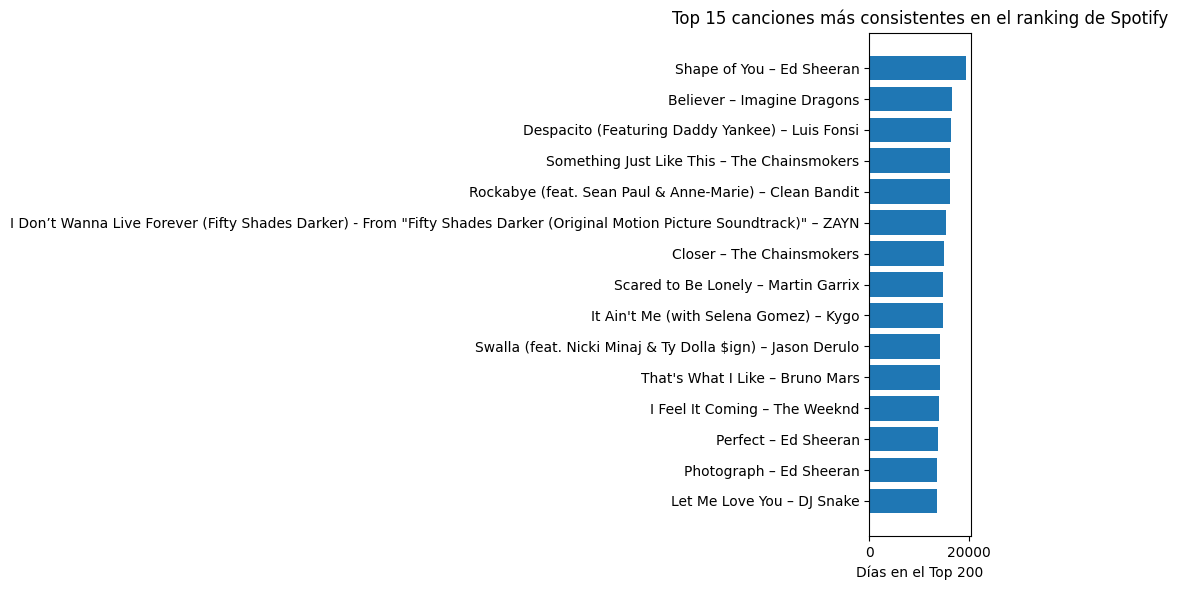

In [42]:
# Cargar tabla Gold de consistencia
path_consistent = GOLD_DIR / "gold_consistent_songs.parquet"
df_consistent = pl.read_parquet(path_consistent)

# Tomamos el Top 15
top_n = 15
df_top_consistent = (
    df_consistent
    .sort("days_in_chart", descending=True)
    .head(top_n)
    # Creamos una etiqueta bonita: "Canción – Artista"
    .with_columns(
        (pl.col("track_name") + " – " + pl.col("artist")).alias("label")
    )
)

# Pasamos a pandas para usar matplotlib
pdf = df_top_consistent.select(["label", "days_in_chart"]).to_pandas()

plt.figure(figsize=(10, 6))
plt.barh(pdf["label"], pdf["days_in_chart"])
plt.gca().invert_yaxis()  # Para que la más alta quede arriba
plt.xlabel("Días en el Top 200")
plt.title("Top 15 canciones más consistentes en el ranking de Spotify")
plt.tight_layout()
plt.show()


2️⃣ Visual 2 — Streams totales por país (Top 10 regiones)

Objetivo: ver en qué países hay más streams en general.

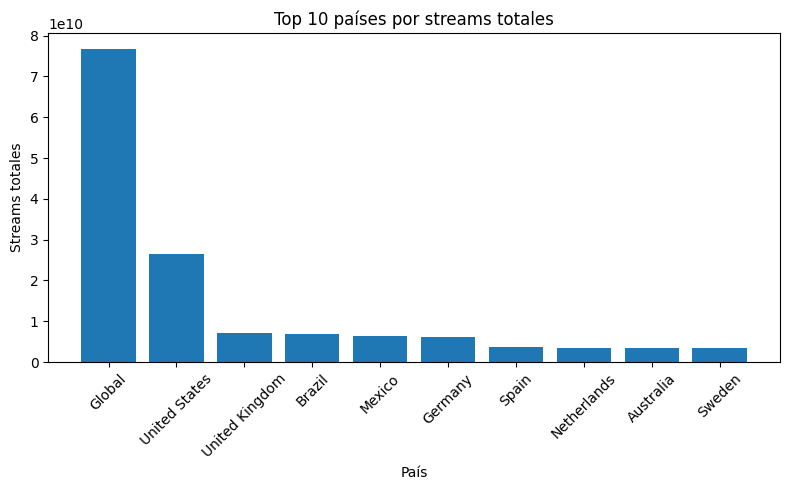

In [43]:
# Cargar tabla de streams por país y canción
path_country = GOLD_DIR / "gold_streams_by_country.parquet"
df_country = pl.read_parquet(path_country)

df_country_total = (
    df_country
    .group_by(["region", "country"])
    .agg(pl.sum("total_streams").alias("total_streams_region"))
    .sort("total_streams_region", descending=True)
    .head(10)
)

pdf_country = df_country_total.to_pandas()

plt.figure(figsize=(8, 5))
plt.bar(pdf_country["country"], pdf_country["total_streams_region"])
plt.xlabel("País")
plt.ylabel("Streams totales")
plt.title("Top 10 países por streams totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3️⃣ Visual 3 — Tendencia global de streams en el tiempo

Objetivo: ver si los streams suben, bajan, hay picos, etc.

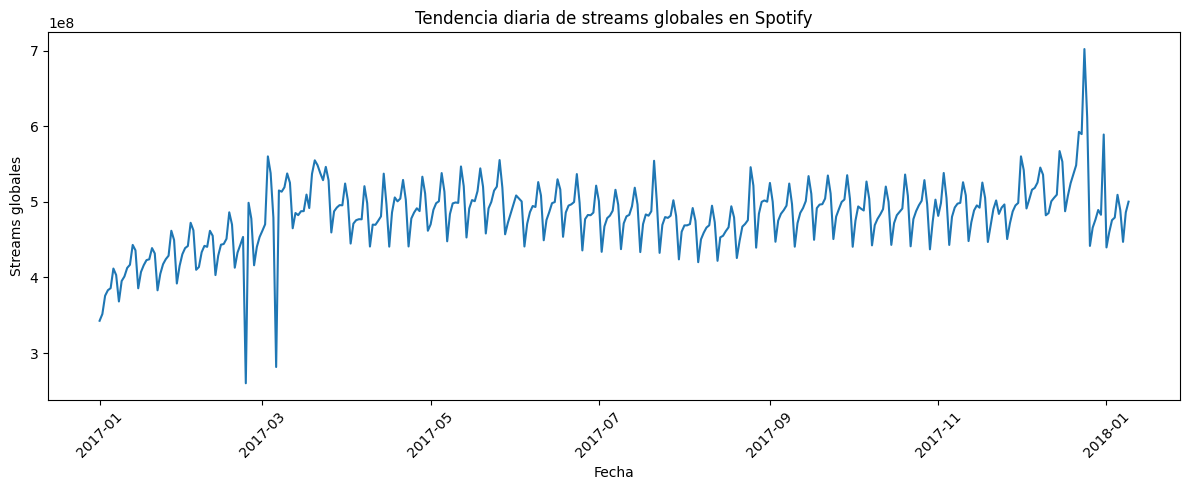

In [27]:
# Cargar tabla de tendencias diarias
path_trends = GOLD_DIR / "gold_daily_trends.parquet"
df_trends = pl.read_parquet(path_trends)

# Ordenamos por fecha por si acaso
df_trends = df_trends.sort("date")

pdf_trends = df_trends.to_pandas()

plt.figure(figsize=(12, 5))
plt.plot(pdf_trends["date"], pdf_trends["total_streams_global"])
plt.xlabel("Fecha")
plt.ylabel("Streams globales")
plt.title("Tendencia diaria de streams globales en Spotify")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4️⃣ Filtrar por un país específico - Republica Dominicana

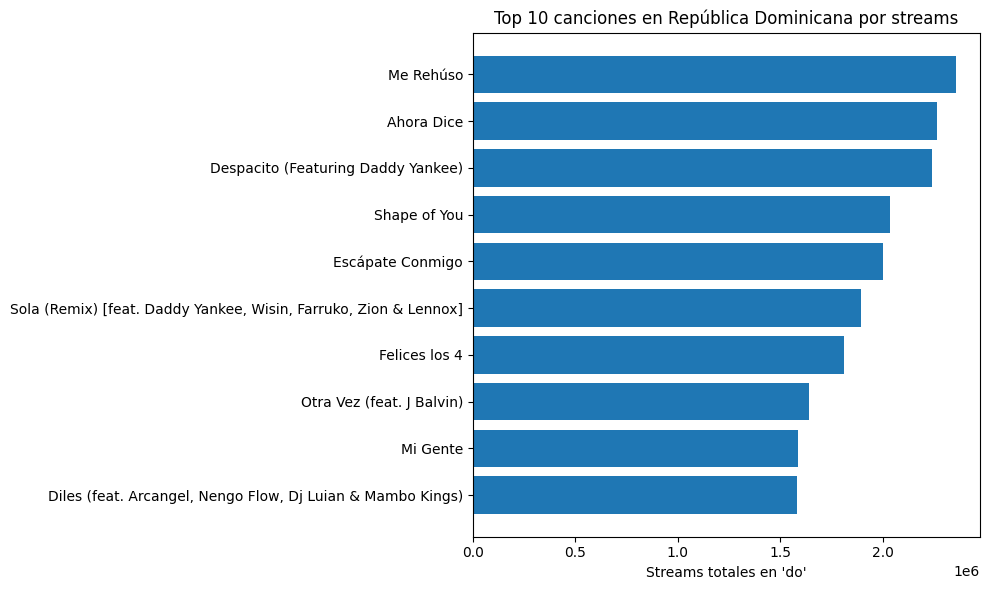

In [44]:
df_country_do = (
    df_country
    .filter(pl.col("region") == "do")
    .sort("total_streams", descending=True)
    .head(10)
)

pdf_do = df_country_do.to_pandas()

plt.figure(figsize=(10, 6))
plt.barh(pdf_do["track_name"], pdf_do["total_streams"])
plt.gca().invert_yaxis()
plt.xlabel("Streams totales en 'do'")
plt.title("Top 10 canciones en República Dominicana por streams")
plt.tight_layout()
plt.show()
